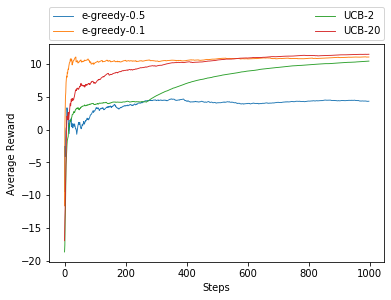

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def getSamplar():
    mu=np.random.normal(0,10)
    sd=abs(np.random.normal(5,2))
    getSample=lambda: np.random.normal(mu,sd)
    return getSample

def e_greedy(Q, e):
##################################################
#		Your code here
##################################################  
    #Q is dictionary in form (possible actions: average reward of action)
    #e is a 0-1 scalar; Return action selected from Q based on reward and epsilon
    #Run a probability weighed between the Q greedy (highest reward) action and a random action
    #from the epsilon random value.
    action_dict = Q
    #Get probabilities for action choices
    
    #random_choice_probability = (e/(len(action_dict) - 1)) 
    random_choice_probability = (e/(len(action_dict))) 
    greedy_choice_probability = 1 - e + random_choice_probability
    #Initialize index and values
    #optimal_action_index = -1
    optimal_action_value = max(action_dict.values())
    #for i in action_dict:
    #  if (action_dict[i] > optimal_action_value):
    #        optimal_action_value = action_dict[i]
    #        #optimal_action_index = i
    
    #prob dictionary creation
    actions = list(action_dict.keys())
    probs = []
    #Creation of a new dictionary matching actions to probability
    for i in action_dict:
      if(action_dict[i] == optimal_action_value):
          #pre_prob_dict[i] = greedy_choice_probability
          probs.append(greedy_choice_probability)
      else:
        probs.append(random_choice_probability)
          #pre_prob_dict[i] = random_choice_probability
    probs = np.array(probs)
    probs /= sum(probs)
    #actions = list(pre_prob_dict.keys())
    #probs = list(pre_prob_dict.values())
    choice = np.random.choice(actions, 1, replace=True, p=probs)
    return choice.item()

    
def upperConfidenceBound(Q, N, c):   
##################################################
#		Your code here
##################################################  
    #Q dictionary (possible action: average reward of action)
    ##N dictionary (possible action: number of times action was taken)
    #C is some scalar
    #Return an action of Q based on algorithm
    # #Q is dictionary in form (possible actions: average reward of action)
    action_dict = Q
    frequency_dict = N
    maximized_expression_value = 0
    choice = 0
    uc_dict = {}
    for action in action_dict:
      #if ((action_dict[action] + c * np.sqrt(np.log(sum(frequency_dict.values()) + 1)/(frequency_dict[action]))) > maximized_expression_value):
      uc_dict[action] = action_dict[action] + c*np.sqrt(np.log(sum(frequency_dict.values()) + 1)/(frequency_dict[action] + 1))
      #choice = action
    choice = max(uc_dict, key = uc_dict.get)
    return choice


def updateQN(action, reward, Q, N):
##################################################
#		Your code here
##################################################  
    #Action = action from Q key taken
    #Reward =  rewal reward retrieved, Q and N are inherite (possible action: number of times action was taken).
    #Return a tuple of updated Q and N.
    qCopy = Q
    nCopy = N
    updatedQ = {}
    updatedN = {}
    #updating number of actions
    #
    #qCopy[action] = ((qCopy[action] * (nCopy[action] - 1)) + reward)/nCopy[action]
    for new_action in N:
      if (new_action == action):
        #if (qCopy[new_action] != 0):
        updatedN[new_action] = N[new_action] + 1
      else:
        updatedN[new_action] = N[new_action] 

    for new_action in Q:
      if (new_action == action):
        #if (qCopy[new_action] != 0):
        updatedQ[new_action] = (((Q[new_action] * (updatedN[new_action] - 1)) + reward) / updatedN[new_action])
      else:
        updatedQ[new_action] = Q[new_action]

    tuple_qn = (updatedQ, updatedN)
    return tuple_qn


def decideMultipleSteps(Q, N, policy, bandit, maxSteps):
##################################################
#		Your code here
##################################################  
    #Q and N are inherited from other
    #Policy likely  reflects choice of formula (using greedy or ucb)
    #Bandit is a function generating reward of action, based on getSampler
    #Policy and bandit are essentially just lambda functions running our helper
    #MaxSteps follows some iteration rule
    #A scalar showing how many steps you have
    #dictionaryOfDictionaries
    #update Q qand N
    #generic
    action_taken = policy(Q, N)
    bandit_value = bandit(action_taken)
    updatedQN = updateQN(action_taken, bandit_value, Q, N)
    action_reward = []
    stepCount_Iterative = list(range(maxSteps - 1)) 
    #Multiple steps are used to tie a policy value
    for i in stepCount_Iterative:
      updatedQN = updateQN(action_taken, bandit_value, updatedQN[0], updatedQN[1])
      action_reward_entry = (action_taken, bandit_value)
      action_reward.append(action_reward_entry)
      iterative_Q = updatedQN[0]
      #print(iterative_Q)
      iterative_N = updatedQN[1]
      #print(iterative_N)
      action_taken = policy(iterative_Q,iterative_N)
      bandit_value = bandit(action_taken)
    
    #how does policy and bandit work, am I supposed to store their values?
    actionReward = action_reward
    stepsDict = {}
    stepsDict["Q"] = iterative_Q
    stepsDict["N"] = iterative_N
    stepsDict["actionReward"] =action_reward
    return  stepsDict
    #a dictionary containing “Q”, “N”, and “actionReward”. The Q and N are updated Q and N. ActionReward is a list that records your action and reward of
    #each step. It contains the tuples (action, reward).


def plotMeanReward(actionReward,label):
    maxSteps=len(actionReward)
    reward=[reward for (action,reward) in actionReward]
    meanReward=[sum(reward[:(i+1)])/(i+1) for i in range(maxSteps)]
    plt.plot(range(maxSteps), meanReward, linewidth=0.9, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')

def main():
    np.random.seed(2020)
    K=10
    maxSteps=1000
    Q={k:0 for k in range(K)}
    N={k:0 for k in range(K)}
    testBed={k:getSamplar() for k in range(K)}
    bandit=lambda action: testBed[action]()
    
    policies={}
    policies["e-greedy-0.5"]=lambda Q, N: e_greedy(Q, 0.5)
    policies["e-greedy-0.1"]=lambda Q, N: e_greedy(Q, 0.1)
    policies["UCB-2"]=lambda Q, N: upperConfidenceBound(Q, N, 2)
    policies["UCB-20"]=lambda Q, N: upperConfidenceBound(Q, N, 20)
    
    allResults = {name: decideMultipleSteps(Q, N, policy, bandit, maxSteps) for (name, policy) in policies.items()}
    
    for name, result in allResults.items():
         plotMeanReward(allResults[name]['actionReward'], label=name)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
    plt.show()
    


if __name__=='__main__':
    main()


In [ ]:
def getSamplar():
    mu=np.random.normal(0,10)
    sd=abs(np.random.normal(5,2))
    getSample=lambda: np.random.normal(mu,sd)
    #return getSample()
    return getSample

In [ ]:
    mu=np.random.normal(0,10)
    sd=abs(np.random.normal(5,2))
    getSample=lambda: np.random.normal(mu,sd)
    print(mu)
    print(sd)
    getSample()

-4.521334172143789
7.688106969368345


-12.960227127436173

In [ ]:
    np.random.seed(2020)
    K=10
    maxSteps=1000
    Q={k:0 for k in range(K)}
    N={k:0 for k in range(K)}

    probs = {}
    probs[0] = 3
    probs
  

{0: 3}

In [ ]:
def e_greedy(Q, e):
##################################################
#		Your code here
##################################################  
    #Q is dictionary in form (possible actions: average reward of action)
    #e is a 0-1 scalar; Return action selected from Q based on reward and epsilon
    #Run a probability weighed between the Q greedy (highest reward) action and a random action
    #from the epsilon random value.
    action_dict = Q
    #Get probabilities for action choices
    greedy_choice_probability = 1 - e
    random_choice_probability = (e/(len(action_dict) - 1)) 
    #Initialize index and values
    #optimal_action_index = -1
    optimal_action_value = max(action_dict.values())
    #for i in action_dict:
    #  if (action_dict[i] > optimal_action_value):
    #        optimal_action_value = action_dict[i]
    #        #optimal_action_index = i
    
    #prob dictionary creation
    actions = list(action_dict.keys())
    probs = []
    #Creation of a new dictionary matching actions to probability
    for i in action_dict:
      if(action_dict[i] == optimal_action_value):
          #pre_prob_dict[i] = greedy_choice_probability
          probs.append(greedy_choice_probability)
      else:
        probs.append(random_choice_probability)
          #pre_prob_dict[i] = random_choice_probability
    probs = np.array(probs)
    probs /= sum(probs)
    #actions = list(pre_prob_dict.keys())
    #probs = list(pre_prob_dict.values())
    choice = np.random.choice(actions, 1, replace=True, p=probs)
    return choice.item()


In [ ]:
    utilityTable={1:2000, 2:-500, 3:100, 4:1000, 5:0}
    #print(Q)
    e = .5
    print(e_greedy(utilityTable, .5))
    action_dict = utilityTable
    #Get probabilities for action choices
    greedy_choice_probability = 1 - e
    random_choice_probability = (e/(len(action_dict) - 1)) 
    #Initialize index and values
    #optimal_action_index = -1
    optimal_action_value = max(action_dict.values())
    #for i in action_dict:
    #  if (action_dict[i] > optimal_action_value):
    #        optimal_action_value = action_dict[i]
    #        #optimal_action_index = i
    
    #prob dictionary creation
    actions = list(action_dict.keys())
    probs = {}
    #Creation of a new dictionary matching actions to probability
    for i in actions:
      if(action_dict[i] == optimal_action_value):
          #pre_prob_dict[i] = greedy_choice_probability
          probs[i] = (greedy_choice_probability)
      else:
        probs[i] = (random_choice_probability)
          #pre_prob_dict[i] = random_choice_probability
        
    print(probs)
    choice = np.random.choice(actions, 1, replace=True, p=list(probs.values()))
    sum(probs.values())

5
{1: 0.5, 2: 0.125, 3: 0.125, 4: 0.125, 5: 0.125}


1.0

In [ ]:
    utilityTable={1:2000, 2:-500, 3:100, 4:1000, 5:0}
    print(min(utilityTable.values()))
    optimal_action_index = 1
    greedy_choice_probability = .85
    random_choice_probability = .15/4

    actions = list(utilityTable.keys())
    probs = {}
    #Creation of a new dictionary matching actions to probability
    for i in actions:
      if(i == optimal_action_index):
          #pre_prob_dict[i] = greedy_choice_probability
          probs[i] = (greedy_choice_probability)
      else:
        probs[i] = random_choice_probability
          #pre_prob_dict[i] = random_choice_probability
    
    #actions = list(pre_prob_dict.keys())
    #probs = list(pre_prob_dict.values())
    print(probs)
    choice = np.random.choice(actions, 1, replace=True, p=list(probs.values()))
    

-500
{1: 0.85, 2: 0.0375, 3: 0.0375, 4: 0.0375, 5: 0.0375}


In [ ]:
    c = 2
    action_dict = utilityTable
    frequency_dict = otherTable
    maximized_expression_value = 0
    choice = 0
    for action in action_dict:
      if (action_dict[action] + c * np.sqrt((2*np.log(action)/(frequency_dict[action]))) > maximized_expression_value):
        maximized_expression_value = action_dict[action] + c*np.sqrt(2*np.log(action)/frequency_dict[action] + 1)
        choice = action
    choice

1

In [ ]:
def upperConfidenceBound(Q, N, c):   
##################################################
#		Your code here
##################################################  
    #Q dictionary (possible action: average reward of action)
    ##N dictionary (possible action: number of times action was taken)
    #C is some scalar
    #Return an action of Q based on algorithm
    # #Q is dictionary in form (possible actions: average reward of action)
    action_dict = Q
    frequency_dict = N
    maximized_expression_value = 0
    choice = 0
    uc_dict = {}
    for action in action_dict:
      #if ((action_dict[action] + c * np.sqrt(np.log(sum(frequency_dict.values()) + 1)/(frequency_dict[action]))) > maximized_expression_value):
      uc_dict[action] = action_dict[action] + c*np.sqrt(np.log(sum(frequency_dict.values()) + 1)/(frequency_dict[action] + 1))
      #choice = action
    choice = max(uc_dict, key = uc_dict.get)
    return choice


In [ ]:
def updateQN(action, reward, Q, N):
##################################################
#		Your code here
##################################################  
    #Action = action from Q key taken
    #Reward =  rewal reward retrieved, Q and N are inherite (possible action: number of times action was taken).
    #Return a tuple of updated Q and N.
    qCopy = Q
    nCopy = N
    updatedQ = {}
    updatedN = {}
    #updating number of actions
    #
    #qCopy[action] = ((qCopy[action] * (nCopy[action] - 1)) + reward)/nCopy[action]
    for new_action in N:
      if (new_action == action):
        #if (qCopy[new_action] != 0):
        updatedN[new_action] = N[new_action] + 1
      else:
        updatedN[new_action] = N[new_action] 

    for new_action in Q:
      if (new_action == action):
        #if (qCopy[new_action] != 0):
        updatedQ[new_action] = (((Q[new_action] * (updatedN[new_action] - 1)) + reward) / updatedN[new_action])
      else:
        updatedQ[new_action] = Q[new_action]

    

        #N is to be updated when Action is taken, increasing the times taken
        #Q is affected by the average reward? Makes sense, action is taken and a new value was generated
        #Take the average as a result.
    
    tuple_qn = (updatedQ, updatedN)
    return tuple_qn


In [ ]:
    utilityTable={1:2000, 2:-500, 3:100, 4:1000, 5:0}
    otherTable={1:5, 2:12, 3:5, 4:20, 5:24}
 
    print(upperConfidenceBound(utilityTable, otherTable, 2))
    print(utilityTable)
    print(otherTable)
    

1
{1: 2000, 2: -500, 3: 100, 4: 1000, 5: 0}
{1: 5, 2: 12, 3: 5, 4: 20, 5: 24}


In [ ]:
def decideMultipleSteps(Q, N, policy, bandit, maxSteps):
##################################################
#		Your code here
##################################################  
    #Q and N are inherited from other
    #Policy likely  reflects choice of formula (using greedy or ucb)
    #Bandit is a function generating reward of action, based on getSampler
    #Policy and bandit are essentially just lambda functions running our helper
    #MaxSteps follows some iteration rule
    #A scalar showing how many steps you have
    #dictionaryOfDictionaries
    #update Q qand N
    #generic
    action_taken = policy(Q, N)
    bandit_value = bandit(action_taken)
    updatedQN = updateQN(action_taken, bandit_value, Q, N)
    action_reward = []
    stepCount_Iterative = list(range(maxSteps - 1)) 
    #Multiple steps are used to tie a policy value
    for i in stepCount_Iterative:
      updatedQN = updateQN(action_taken, bandit_value, updatedQN[0], updatedQN[1])
      action_reward_entry = (action_taken, bandit_value)
      action_reward.append(action_reward_entry)
      iterative_Q = updatedQN[0]
      #print(iterative_Q)
      iterative_N = updatedQN[1]
      #print(iterative_N)
      action_taken = policy(iterative_Q,iterative_N)
      bandit_value = bandit(action_taken)
    
    #how does policy and bandit work, am I supposed to store their values?
    actionReward = action_reward
    stepsDict = {}
    stepsDict["Q"] = iterative_Q
    stepsDict["N"] = iterative_N
    stepsDict["actionReward"] =action_reward
    return  stepsDict
    #a dictionary containing “Q”, “N”, and “actionReward”. The Q and N are updated Q and N. ActionReward is a list that records your action and reward of
    #each step. It contains the tuples (action, reward).


In [ ]:
def plotMeanReward(actionReward,label):
    maxSteps=len(actionReward)
    reward=[reward for (action,reward) in actionReward]
    meanReward=[sum(reward[:(i+1)])/(i+1) for i in range(maxSteps)]
    plt.plot(range(maxSteps), meanReward, linewidth=0.9, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')

In [ ]:
    np.random.seed(2020)
    K=10
    testBed={k:getSamplar() for k in range(K)}
    testBed
    bandit=lambda action: testBed[action]()
    bandit(1)

-3.5793533556053108

In [ ]:
K = 10
Q={k:0 for k in range(K)}
N={k:0 for k in range(K)}
print(Q)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


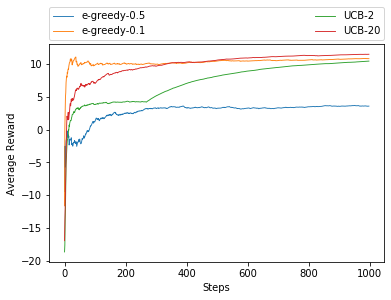

In [ ]:
def main():
    np.random.seed(2020)
    K=10
    maxSteps=1000
    Q={k:0 for k in range(K)}
    N={k:0 for k in range(K)}
    testBed={k:getSamplar() for k in range(K)}
    bandit=lambda action: testBed[action]()
    policies={}
    policies["e-greedy-0.5"]=lambda Q, N: e_greedy(Q, 0.5)
    policies["e-greedy-0.1"]=lambda Q, N: e_greedy(Q, 0.1)
    policies["UCB-2"]=lambda Q, N: upperConfidenceBound(Q, N, 2)
    policies["UCB-20"]=lambda Q, N: upperConfidenceBound(Q, N, 20)
    
    allResults = {name: decideMultipleSteps(Q, N, policy, bandit, maxSteps) for (name, policy) in policies.items()}
    
    for name, result in allResults.items():
         plotMeanReward(allResults[name]['actionReward'], label=name)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
    plt.show()
    


if __name__=='__main__':
    main()